# **Project 2: Linear Regression**

imports

In [ ]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

# **Replicating Figure 3.7**

In this section we replicate figure 3.7 from the text book. 


This functions takes in a values and outputs f(x) and the targests

In [ ]:
def getplot1(a0, a1, x, norm):
  #x = np.random.uniform(-1,1,size)
  f = a0 + a1 * x
  #t = f + np.random.normal(0,sigma,size)
  t = f + norm

  return f, t

This function gets the draws by using equation 3.50 to get mn (the mean) and equation 3.51 to get sn (the covariance matrix). This mn and sn are then used to get 6 random draws from a multivariate normal distribution

In [ ]:
def getDraws(x,alpha,beta,targets,size):
  #n x m
  #phi = [1, x[0]; 1, x[1];...]
  phi = np.empty((0,2), float)
  for i in range(0,len(x)):
    phi = np.vstack( (phi, np.array([1, x[i][0]])) )

  #equation 3.51
  sn = alpha*np.eye(2) + beta*np.matmul(phi.T,phi)
  sn = np.linalg.inv(sn)

  #equation 3.50
  mn = beta*np.matmul(sn,np.matmul(phi.T,np.asmatrix(targets).T)) 
  mn = mn.flatten()
  mn = np.array(mn)

  draws = np.random.multivariate_normal(mean=mn[0], cov=sn, size = size)

  return draws


Replicating the graph

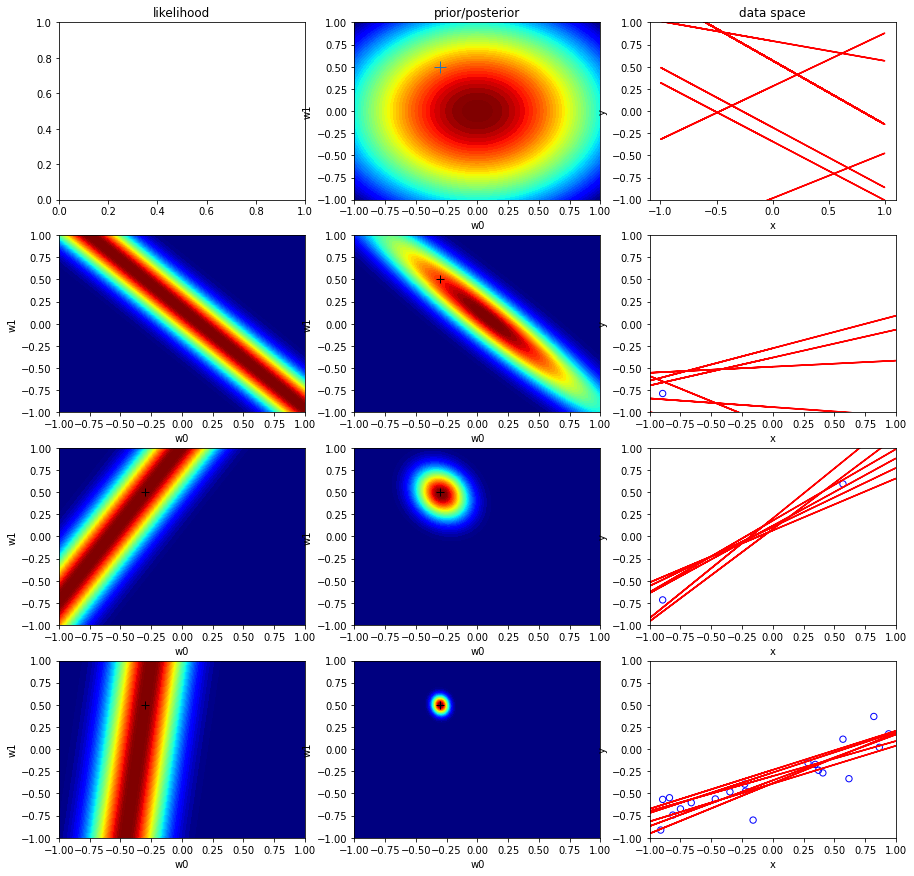

In [ ]:
from scipy.stats import norm
import random

plt.figure(figsize=(15,15))

F = []
T = []

plt.subplot(4,3,1)
# plt.plot(a,a)
plt.title("likelihood")

#first row 2nd col
plt.subplot(4,3,2)
a3 = [-0.3, 0.5]

a = np.linspace(-1,1,1000)

x = np.asmatrix(norm.pdf(a)).T 
y = np.asmatrix(norm.pdf(a)) 

w = x * y
# w = 0.5*x - 0.3*y

#sns.heatmap(w,cmap='plasma',xticklabels=[], yticklabels=[] , cbar=False)
plt.contourf(a,a,w,50,cmap=plt.cm.jet,extend='both')
plt.plot(-0.3,0.5, marker='+', markersize=12)
plt.xlabel('w0')
plt.ylabel('w1')
plt.title("prior/posterior")


#first row 3rd col
sigma = 0.2
alpha = 2.0
beta = (1/sigma) ** 2
size = 1000

#get random a0 and a1 values
a0 = random.choices(a, weights = x, k = 6)
a1 = random.choices(a, weights = y.T, k = 6)
x = np.random.uniform(-1,1,size)
noise = np.random.normal(0,sigma,size)
plt.subplot(4,3,3)
#plot f(x)
for i in range(0, 6):

  f, t = getplot1(a0[i] , a1[i],x,noise)
  plt.plot(x,f,c='red')
  F.append(f)
  T.append(t)

plt.ylim(-1,1)
plt.xlabel('x')
plt.ylabel('y')
plt.title("data space")

#2nd row first col (first likihood)
plt.subplot(4,3,4)
xdata = [] # values used to find the target later on
xn = np.random.uniform(-1,1,1)
xdata.append(xn) 
likihoods = []
from scipy.stats import norm
for i in range(0,1000):
  #norm.pdf(x, loc, scale)
  loc = a3[0] + (-a3[1]+a[i])*xn[0]
  likihood = norm.pdf(a,loc,np.sqrt(1/beta))
  likihoods.append(likihood)
likihoods = np.array(likihoods)
#sns.heatmap(likihoods,cmap='plasma',xticklabels=[], yticklabels=[] , cbar=False)
plt.contourf(a,a,likihoods,50,cmap=plt.cm.jet,extend='both')
#plt.contourf(likihoods)
plt.xlabel('w0')
plt.ylabel('w1')

#2nd row 2nd col
plt.subplot(4,3,5)
prior1 = np.multiply(w,likihoods)
prior1 = prior1/np.max(prior1)
# sns.heatmap(prior1,cmap='plasma',xticklabels=[], yticklabels=[] , cbar=False)
plt.contourf(a,a,prior1,50,cmap=plt.cm.jet,extend='both')
plt.plot(-0.3,0.5, marker='+', markersize=8, color='black')
plt.xlabel('w0')
plt.ylabel('w1')

#2nd row 3rd col
plt.subplot(4,3,6)
#xdata = xn[0]
ydata = -0.3*np.ones(len(xdata)) + 0.5*np.array(xdata).T
ydata = ydata + np.random.normal(0,sigma,len(xdata))
plt.scatter(xdata, ydata, s=40, facecolors='none', edgecolors='b')
draws = getDraws(xdata,alpha,beta,ydata,6)

for i in range(0, 6):

  f, t = getplot1(draws[i][0] , draws[i][1], x ,noise)
  plt.plot(x,f,c='red')
  F.append(f)
  T.append(t)


#plt.plot(xdata, ydata, color='blue', marker='o', markersize=12)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('x')
plt.ylabel('y')

#3rd row 1st col
plt.subplot(4,3,7)
xn = np.random.uniform(-1,1,1)
xdata.append(xn) 
likihoods1 = []
from scipy.stats import norm
for i in range(0,1000):
  #norm.pdf(x, loc, scale)
  loc = a3[0] + (-a3[1]+a[i])*xn[0]
  likihood = norm.pdf(a,loc,np.sqrt(1/beta))
  likihoods1.append(likihood)
likihoods1 = np.array(likihoods1)
#sns.heatmap(likihoods,cmap='plasma',xticklabels=[], yticklabels=[] , cbar=False)
plt.contourf(a,a,likihoods1,50,cmap=plt.cm.jet,extend='both')
plt.plot(-0.3,0.5, marker='+', markersize=8,color='black')
#plt.contourf(likihoods)
plt.xlabel('w0')
plt.ylabel('w1')

#3rd row 2nd col
plt.subplot(4,3,8)
prior2 = np.multiply(prior1,likihoods1)
# sns.heatmap(prior1,cmap='plasma',xticklabels=[], yticklabels=[] , cbar=False)
prior2 = prior2/np.max(prior2)
plt.contourf(a,a,prior2,50,cmap=plt.cm.jet,extend='both')
plt.plot(-0.3,0.5, marker='+', markersize=8,color='black')
plt.xlabel('w0')
plt.ylabel('w1')

#3rd row 3rd col
plt.subplot(4,3,9)
ydata = -0.3*np.ones(len(xdata)) + 0.5*np.array(xdata).T
ydata = ydata + np.random.normal(0,sigma,len(xdata))

plt.scatter(xdata, ydata, s=40, facecolors='none', edgecolors='b')

draws = getDraws(xdata,alpha,beta,ydata,6)

for i in range(0, 6):

  f, t = getplot1(draws[i][0] , draws[i][1], x ,noise)
  plt.plot(x,f,c='red')
  F.append(f)
  T.append(t)

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('x')
plt.ylabel('y')

#4th row 1st col
plt.subplot(4,3,10)
xn = np.random.uniform(-1,1,1)
likihoods2 = []
from scipy.stats import norm
for i in range(0,1000):
  #norm.pdf(x, loc, scale)
  loc = a3[0] + (-a3[1]+a[i])*xn[0]
  likihood = norm.pdf(a,loc,np.sqrt(1/beta))
  likihoods2.append(likihood)
likihoods2 = np.array(likihoods2)
#sns.heatmap(likihoods,cmap='plasma',xticklabels=[], yticklabels=[] , cbar=False)
plt.contourf(a,a,likihoods2,50,cmap=plt.cm.jet,extend='both')
plt.plot(-0.3,0.5, marker='+', markersize=8,color='black')
#plt.contourf(likihoods)
plt.xlabel('w0')
plt.ylabel('w1')

#4th row 2nd col
plt.subplot(4,3,11)
for i in range (0, 18):
  xn = np.random.uniform(-1,1,1)
  xdata.append(xn)
  likihoods = []
  for j in range(0,1000):
    #norm.pdf(x, loc, scale)
    loc = a3[0] + (-a3[1]+a[j])*xn[0]
    likihood = norm.pdf(a,loc,np.sqrt(1/beta))
    likihoods.append(likihood)
  likihoods = np.array(likihoods)
  prior2 = np.multiply(prior2,likihoods)
  prior2 = prior2/np.max(prior2)

# prior3 = np.multiply(prior2,likihoods2)
# # sns.heatmap(prior1,cmap='plasma',xticklabels=[], yticklabels=[] , cbar=False)
# prior3 = prior3/np.max(prior3)
plt.contourf(a,a,prior2,50,cmap=plt.cm.jet,extend='both')
plt.plot(-0.3,0.5, marker='+', markersize=8,color='black')
plt.xlabel('w0')
plt.ylabel('w1')

#4th row 3rd col
plt.subplot(4,3,12)
ydata = -0.3*np.ones(len(xdata)) + 0.5*np.array(xdata).T
ydata = ydata + np.random.normal(0,sigma,len(xdata))
plt.scatter(xdata, ydata, s=40, facecolors='none', edgecolors='b')

draws = getDraws(xdata,alpha,beta,ydata,6)

for i in range(0, 6):

  f, t = getplot1(draws[i][0] , draws[i][1], x ,noise)
  plt.plot(x,f,c='red')
  F.append(f)
  T.append(t)

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# **Replicating Figure 3.8**

Equation 3.4 

In [ ]:
def phi_x(x, mu,s):
  phi = []
  for i in x:
    ii = i * np.ones(9)
    phi_i = np.exp(-np.square(ii-np.asmatrix(mu))/(2*(s**2)))
    #print(phi_i.shape)
    phi.append(phi_i)
    #np.vstack([phi,phi_i])
  
  phi = np.array(phi)
  #phi = phi.T
  return phi

Equation 3.51

In [ ]:
def s_n(phi,alpha,beta):
  S_n = alpha*np.eye(9) + beta*np.matmul(phi.T,phi)
  S_n = np.linalg.inv(S_n)
  return S_n

Equation 3.50

In [ ]:
def m_n(phi,beta, s_n, t):
  m_n = beta*np.matmul(s_n,np.matmul(phi.T,t)) 
  return m_n

The functions below get mean + var and mean - var and flatten them out so that fill_between could be used for the plot

In [ ]:
def gety1(mean,var):
  y1 = (mean+np.sqrt(var))
  y1 = np.array(y1)
  y1 = y1.flatten()
  return y1

In [ ]:
def gety2(mean,var):
  y2 = (mean-np.sqrt(var))
  y2 = np.array(y2)
  y2 = y2.flatten()
  return y2

Given a N (number of obs) will return the mean and the var along with the x and y data. Based off equations 3.58 and 3.59

In [ ]:
def getplot2(N):

  #9 gaussian basis functions

  x_space = np.linspace(0,1,1000)
  #N = 200
  sigma = .2
  beta = (1/sigma) ** 2
  alpha = 2
  s = 0.1
  mu = np.linspace(-1,1,9)

  xn = np.random.uniform(0,1,N)
  yn = np.sin(2*np.pi*xn) 
  yn = yn + np.random.normal(0,sigma,N)
  yn = np.array(yn)

  sine = np.sin(2*np.pi*x_space)

  # plt.plot(x_space,sine,color="lightgreen")
  # plt.scatter(xn, yn, s=40, facecolors='none', edgecolors='b')


  phi_xx = phi_x(xn,mu,s) # Nx9
  phi_xx = np.asmatrix(phi_xx)
  #print(phi_xx)


  S = s_n(phi_xx,alpha,beta)

  var = []
  for x in x_space:
    phi = phi_x(np.array([x]).T,mu,s).T
    phi = np.asmatrix(phi).T
    vartemp = 1/beta + np.matmul(phi.T,np.matmul(S, phi)) #eq 3.59
    # np.hstack([var,vartemp])
    var.append(vartemp)
  var = np.asmatrix(np.array(var))

  m = beta*np.matmul(S,np.matmul(phi_xx.T,np.asmatrix(yn).T)) #eq 3.58

  mean = []
  for x in x_space:
    phi = phi_x(np.array([x]).T,mu,s).T
    phi = np.asmatrix(phi).T
    meantemp = np.matmul(np.asmatrix(m.T), phi) #if 1000x1 then m_n N X 1000 and phi has to be N X 1
    mean.append(meantemp)
    #np.hstack([mean,meantemp])

  mean = np.asmatrix(np.array(mean))

  return x_space, mean, var, xn, yn

In [ ]:
plt.plot(x_space,sine,color="lightgreen")
plt.scatter(xn, yn, s=40, facecolors='none', edgecolors='b')
plt.plot(x_space,mean.T,color="red")

y1 = (mean+np.sqrt(var))
y1 = np.array(y1)
y1 = y1.flatten()

y2 = (mean-np.sqrt(var))
y2 = np.array(y2)
y2 = y2.flatten()

plt.fill_between(x_space, y1, y2, facecolor="lightcoral", color='lightcoral',alpha=0.2)       


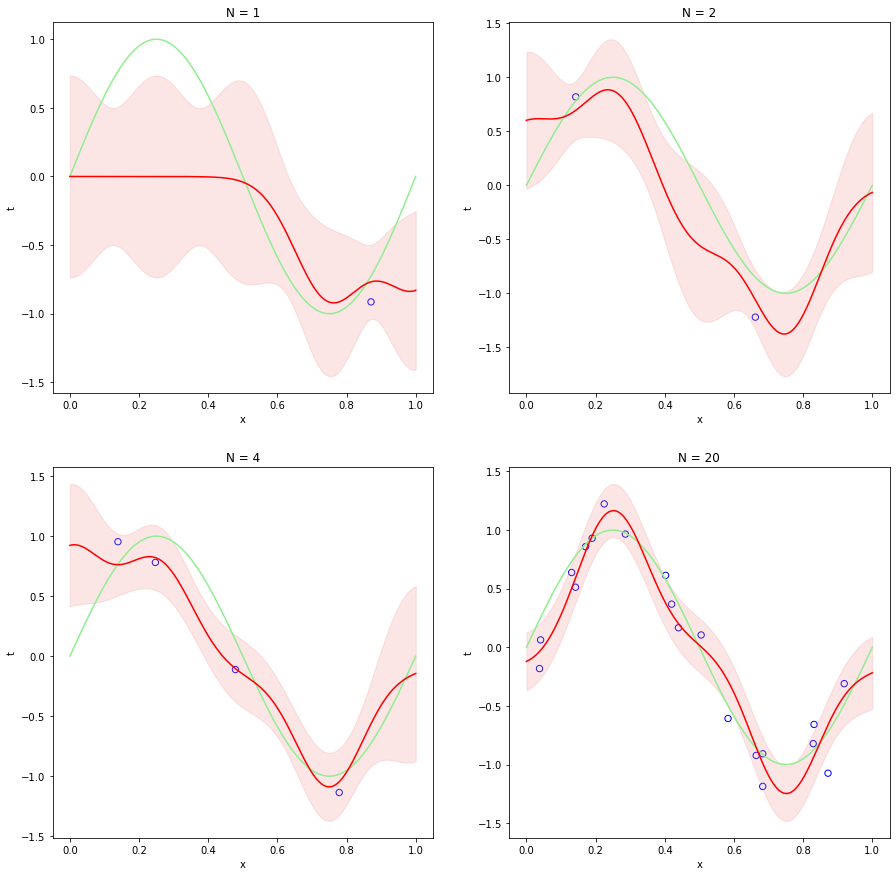

In [ ]:
fig, axs = plt.subplots(2, 2, figsize = (15,15))

x_space, mean, var, xn, yn = getplot2(1)
axs[0, 0].plot(x_space,sine,color="lightgreen")
axs[0, 0].scatter(xn, yn, s=40, facecolors='none', edgecolors='b')
axs[0, 0].plot(x_space,mean.T,color="red")
axs[0, 0].fill_between(x_space, gety1(mean,var), gety2(mean,var), facecolor="lightcoral", color='lightcoral',alpha=0.2)
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('t')
axs[0, 0].set_title('N = 1')

x_space, mean, var, xn, yn = getplot2(2)
axs[0, 1].plot(x_space,sine,color="lightgreen")
axs[0, 1].scatter(xn, yn, s=40, facecolors='none', edgecolors='b')
axs[0, 1].plot(x_space,mean.T,color="red")
axs[0, 1].fill_between(x_space, gety1(mean,var), gety2(mean,var), facecolor="lightcoral", color='lightcoral',alpha=0.2)
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('t')
axs[0, 1].set_title('N = 2')

x_space, mean, var, xn, yn = getplot2(4)
axs[1, 0].plot(x_space,sine,color="lightgreen")
axs[1, 0].scatter(xn, yn, s=40, facecolors='none', edgecolors='b')
axs[1, 0].plot(x_space,mean.T,color="red")
axs[1, 0].fill_between(x_space, gety1(mean,var), gety2(mean,var), facecolor="lightcoral", color='lightcoral',alpha=0.2)
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('t')
axs[1, 0].set_title('N = 4')

x_space, mean, var, xn, yn = getplot2(20)
axs[1, 1].plot(x_space,sine,color="lightgreen")
axs[1, 1].scatter(xn, yn, s=40, facecolors='none', edgecolors='b')
axs[1, 1].plot(x_space,mean.T,color="red")
axs[1, 1].fill_between(x_space, gety1(mean,var), gety2(mean,var), facecolor="lightcoral", color='lightcoral',alpha=0.2)
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('t')
axs[1, 1].set_title('N = 20')

fig.show()

wow looks good!!!

# **Stretch Goal**

estimated the value of alpha and beta using equations 3.92 and 3.95

In [ ]:
# alpha = 2
# beta = 25
sigma = .2
beta = (1/sigma) ** 2
alpha = 2
alphas = []
betas = []

mu = np.linspace(-1,1,9)
# alphas = []
# betas = []
N = 500
x = np.random.uniform(0,1,N)
y = np.sin(2*np.pi*x) 
y = y + np.random.normal(0,sigma,N)
y = np.array(y)


for N in range(1,500):
  # print("alpha:", alpha)
  # print("beta:", beta)
  xn = x[0:N]
  yn = y[0:N]
  #alpha
  phi = phi_x(xn,mu,s)
  phi = np.asmatrix(phi)
  S = s_n(phi,alpha,beta)
  M = beta*np.matmul(S,np.matmul(phi.T,np.asmatrix(yn).T))

  lam = np.linalg.eig(beta * (phi.T @ phi)) #eq 3.87
  gam = np.sum(lam[0]/(alpha + lam[0])) #eq 3.91


  alpha = np.real(gam/(np.matmul(M.T,M))) #eq 3.92

  alpha = np.array(alpha)[0][0]
  alphas.append(alpha)
  # alpha
  #print("got here")
  #beta
  beta = (1/(N - gam)) * (np.sum(np.square(yn - np.matmul(M.T,phi.T) ) ))
  beta = np.real(1/beta)
  betas.append(beta)

print("alpha:", alpha)
print("beta:", beta)

alpha: 1.7006069427676376
beta: 19.13803694587132


Estimates are graphed with respect to an increasing N and as seen from the graphs alpha and beta do seem to converge

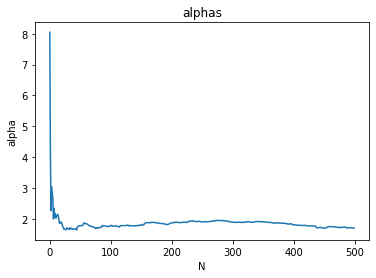

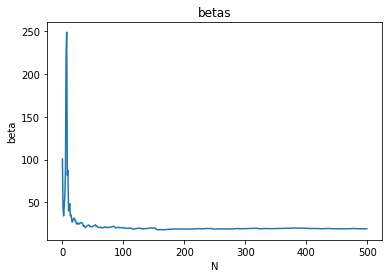

In [ ]:
N = np.linspace(0,len(alphas),len(alphas))
plt.figure()
plt.plot(N, alphas)
plt.title("alphas")
plt.xlabel("N")
plt.ylabel("alpha")
plt.show()

plt.figure()
plt.plot(N, betas)
plt.title("betas")
plt.xlabel("N")
plt.ylabel("beta")

plt.show()